## Using pandas for Better (and Worse) Data Science

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## DataSet: Stanford Open Policing Project

In [2]:
df = pd.read_csv('police.csv')

In [3]:
df.head(10)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
5,2005-03-23,09:45,NaN,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
6,2005-04-01,17:30,NaN,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
7,2005-06-06,13:20,NaN,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
8,2005-07-13,10:15,NaN,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
9,2005-07-13,15:45,NaN,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
df.shape

(91741, 15)

In [5]:
df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [6]:
df.isna().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

## 1. Remove the column that only contains missing values

In [7]:
df.drop(columns='county_name',axis=1,inplace=True)

In [8]:
df.shape

(91741, 14)

In [9]:
df.isna().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [10]:
df.dropna(how='all',axis=1,inplace=True)

In [11]:
df.shape

(91741, 14)

## 2. Do men or women speed more often?

In [12]:
# Percentage of Male and Female in the dataset
df.driver_gender.value_counts(normalize=True)

M    0.727901
F    0.272099
Name: driver_gender, dtype: float64

In [13]:
df.violation.value_counts(normalize=True)

Speeding               0.560862
Moving violation       0.187760
Equipment              0.127534
Other                  0.049961
Registration/plates    0.039719
Seat belt              0.034164
Name: violation, dtype: float64

In [14]:
# when someone is stopped for speeding, how often is it a man or woman?
df.loc[df.violation=='Speeding','driver_gender'].value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [15]:
# when a man is pulled over, how often is it for speeding?
df.loc[df.driver_gender=='M','violation'].value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [16]:
# when a woman is pulled over, how often is it for speeding?
df.loc[df.driver_gender=='F','violation'].value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [17]:
# combines the two lines above
df.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [18]:
df.groupby('driver_gender').violation.value_counts(normalize=True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


## 3. Does gender affect who gets searched during a stop?

In [19]:
# ignore gender for the moment
df.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [20]:
# how does this work?
df.search_conducted.mean()

0.03483720473942948

In [21]:
# search rate by gender
df.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [22]:
df.groupby('driver_gender').search_conducted.value_counts(normalize=True)

driver_gender  search_conducted
F              False               0.979967
               True                0.020033
M              False               0.956674
               True                0.043326
Name: search_conducted, dtype: float64

In [23]:
# include a second factor
df.groupby(['violation','driver_gender']).search_conducted.mean().unstack()

driver_gender,F,M
violation,,
Equipment,0.042622,0.070081
Moving violation,0.036205,0.059831
Other,0.056522,0.047146
Registration/plates,0.066140,0.110376
Seat belt,0.012598,0.037980
Speeding,0.008720,0.024925


## 4. Why is search_type missing so often?

In [24]:
df.isna().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [25]:
# maybe search_type is missing any time search_conducted is False?
df.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [26]:
# test that theory, why is the Series empty?
df[df.search_conducted == False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

In [27]:
# value_counts ignores missing values by default
df[df.search_conducted == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [28]:
# when search_conducted is True, search_type is never missing
df[df.search_conducted == True].search_type.value_counts(dropna=False)

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonable Suspicion                         11
Incident to Arrest,Invent

In [29]:
# alternative
df[df.search_conducted == True].search_type.isnull().sum()

0

## 5. During a search, how often is the driver frisked?

In [30]:
df[df.search_conducted == True].search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonable Suspicion                         11
Incident to Arrest,Invent

In [31]:
# includes partial matches
df['frisk'] = df.search_type.str.contains('Protective Frisk')

In [32]:
# seems about right
df['frisk'].value_counts()

False    2922
True      274
Name: frisk, dtype: int64

In [33]:
# excludes stops that didn't involve a search
print(274/(2922+274))

0.08573216520650813


In [34]:
# frisk rate during a search
df.frisk.mean()

0.08573216520650813

## 6. Which year had the least number of stops?

In [35]:
df.head(10)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
5,2005-03-23,09:45,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,NaN
6,2005-04-01,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
7,2005-06-06,13:20,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
8,2005-07-13,10:15,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
9,2005-07-13,15:45,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


In [36]:
# make sure you create this column
combined = df.stop_date.str.cat(df.stop_time, sep=' ')
df['stop_datetime'] = pd.to_datetime(combined)

In [37]:
# why is 2005 so much smaller?
df.stop_datetime.dt.year.value_counts().sort_values()

2005     2558
2010     7561
2009     7908
2013     7924
2011     8126
2015     8599
2008     8752
2014     9228
2007     9476
2006    10639
2012    10970
Name: stop_datetime, dtype: int64

- Consider removing chunks of data that may be biased
- Use the datetime data type for dates and times

## 7. How does drug activity change by time of day?

In [38]:
df.drugs_related_stop.value_counts(normalize=True)

False    0.991116
True     0.008884
Name: drugs_related_stop, dtype: float64

In [39]:
# baseline rate
df.drugs_related_stop.mean()

0.008883705213590434

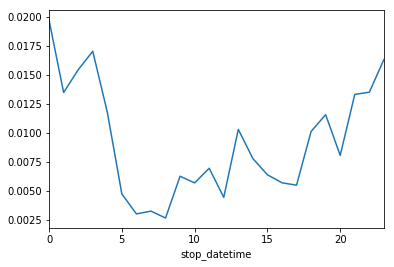

In [40]:
# can't groupby 'hour' unless you create it as a column
df.groupby(df.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

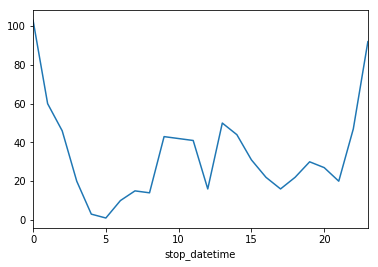

In [41]:
# alternative: count drug-related stops by hour
df.groupby(df.stop_datetime.dt.hour).drugs_related_stop.sum().plot()

## 8. Do most stops occur at night?

In [42]:
df.stop_datetime.dt.hour.value_counts().sort_values(ascending=False)

10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: stop_datetime, dtype: int64

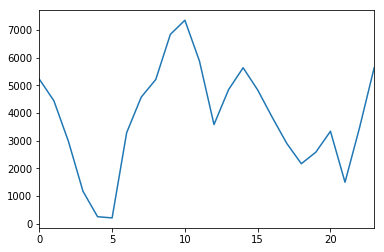

In [43]:
df.stop_datetime.dt.hour.value_counts().sort_index().plot()

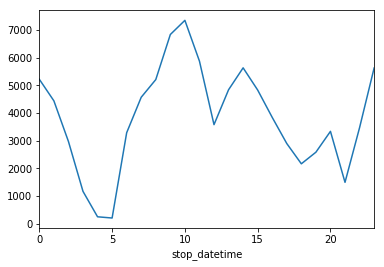

In [44]:
# alternative method
df.groupby(df.stop_datetime.dt.hour).stop_date.count().plot()

## 9. Find the bad data in the stop_duration column and fix it

In [45]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [46]:
# Remove 1 and 2 and make it as NaN since we don't know that they are mins or hours
import numpy as np
df.loc[(df.stop_duration=='1')|(df.stop_duration=='2'),'stop_duration'] = np.nan

In [47]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

## 10. What is the mean stop_duration for each violation_raw?

In [48]:
df.loc[:,['violation_raw','stop_duration']]

,violation_raw,stop_duration
0,Speeding,0-15 Min
1,Speeding,0-15 Min
2,Speeding,0-15 Min
3,Call for Service,16-30 Min
4,Speeding,0-15 Min
5,Equipment/Inspection Violation,0-15 Min
6,Speeding,0-15 Min
7,Speeding,0-15 Min
8,Speeding,0-15 Min
9,Speeding,0-15 Min


In [49]:
df.violation_raw.value_counts(dropna=False)

Speeding                            48463
Other Traffic Violation             16224
Equipment/Inspection Violation      11020
NaN                                  5333
Registration Violation               3432
Seatbelt Violation                   2952
Special Detail/Directed Patrol       2455
Call for Service                     1298
Violation of City/Town Ordinance      211
Motorist Assist/Courtesy              203
APB                                    79
Suspicious Person                      56
Warrant                                15
Name: violation_raw, dtype: int64

In [50]:
df.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
Name: stop_duration, dtype: int64

In [51]:
# make sure you create this column
df['stop_duration'] = df.stop_duration.map({'0-15 Min':8,'16-30 Min':23,'30+ Min':45})

In [52]:
df.stop_duration.value_counts()

8.0     69543
23.0    13635
45.0     3228
Name: stop_duration, dtype: int64

In [53]:
df.groupby(df.violation_raw).stop_duration.mean().sort_values(ascending=False)

violation_raw
Call for Service                    22.034669
Warrant                             21.400000
APB                                 20.987342
Suspicious Person                   18.750000
Motorist Assist/Courtesy            16.916256
Special Detail/Directed Patrol      15.061100
Other Traffic Violation             13.900265
Registration Violation              13.745629
Violation of City/Town Ordinance    13.388626
Equipment/Inspection Violation      11.460345
Speeding                            10.577690
Seatbelt Violation                   9.741531
Name: stop_duration, dtype: float64

In [54]:
df.groupby(df.violation_raw).stop_duration.agg(['mean','count']).sort_values(by='mean',ascending=False)

,mean,count
violation_raw,,
Call for Service,22.034669,1298
Warrant,21.400000,15
APB,20.987342,79
Suspicious Person,18.750000,56
Motorist Assist/Courtesy,16.916256,203
Special Detail/Directed Patrol,15.061100,2455
Other Traffic Violation,13.900265,16223
Registration Violation,13.745629,3432
Violation of City/Town Ordinance,13.388626,211


## 11. Plot the results of the first groupby from the previous exercise

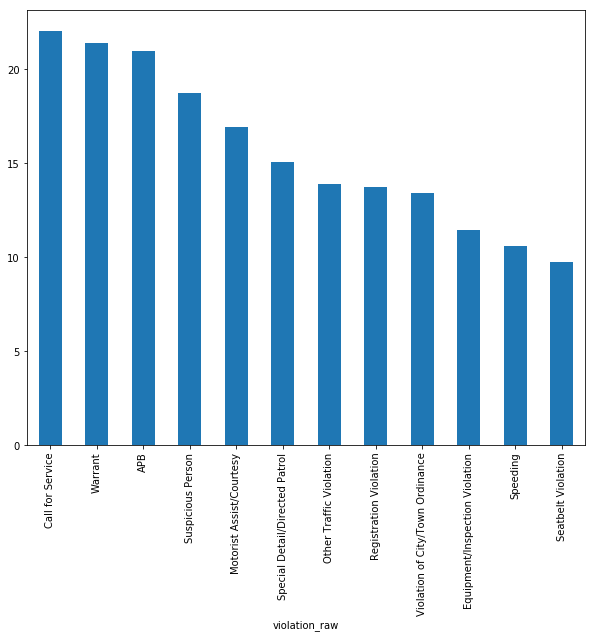

In [55]:
df.groupby(df.violation_raw).stop_duration.mean().sort_values(ascending=False).plot(kind='bar',figsize=(10,8))

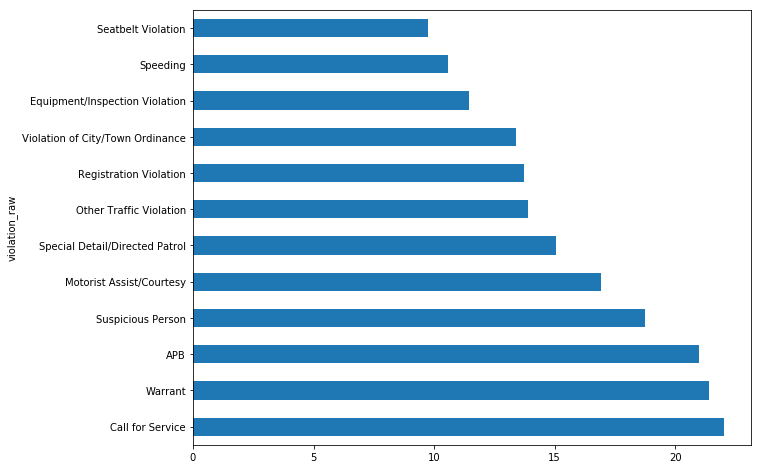

In [56]:
df.groupby(df.violation_raw).stop_duration.mean().sort_values(ascending=False).plot(kind='barh',figsize=(10,8))

## 12. Compare the age distributions for each violation

In [57]:
df.groupby(df.violation).driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11007.0,31.781503,11.400900,16.0,23.0,28.0,38.0,89.0
Moving violation,16164.0,36.120020,13.185805,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.536870,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48361.0,33.530097,12.821847,15.0,23.0,30.0,42.0,90.0


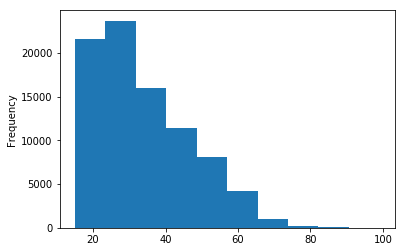

In [58]:
# histograms are excellent for displaying distributions
df.driver_age.plot(kind='hist')

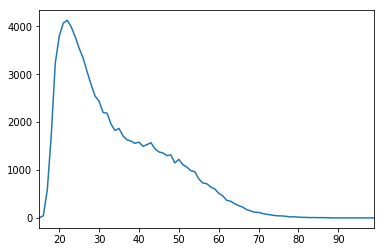

In [59]:
# similar to a histogram
df.driver_age.value_counts().sort_index().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae24f80dd8>,
      dtype=object)

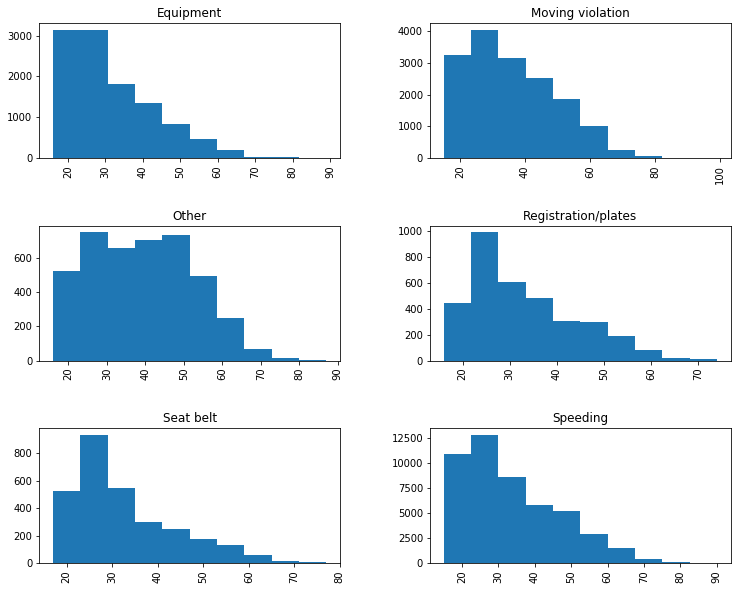

In [60]:
# can't use the plot method
df.hist('driver_age', by='violation',figsize=(12,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae24c207b8>,
      dtype=object)

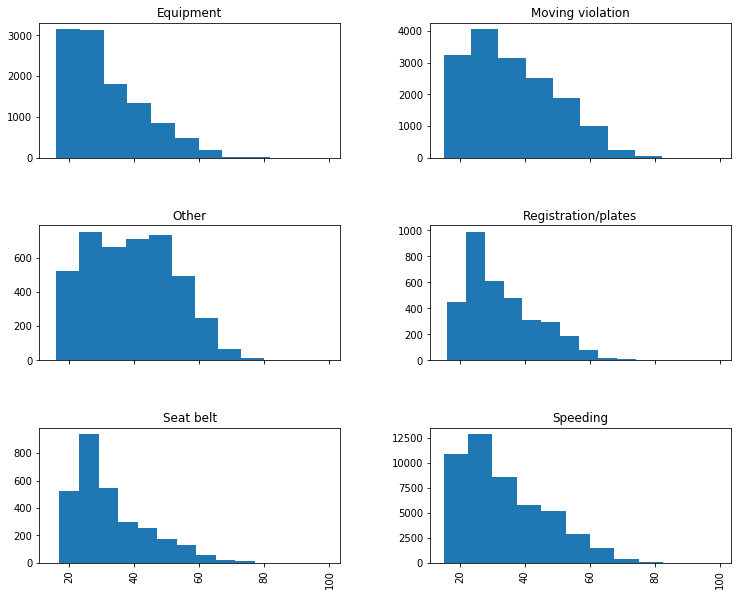

In [61]:
df.hist('driver_age', by='violation',sharex=True,figsize=(12,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae249f5b00>,
      dtype=object)

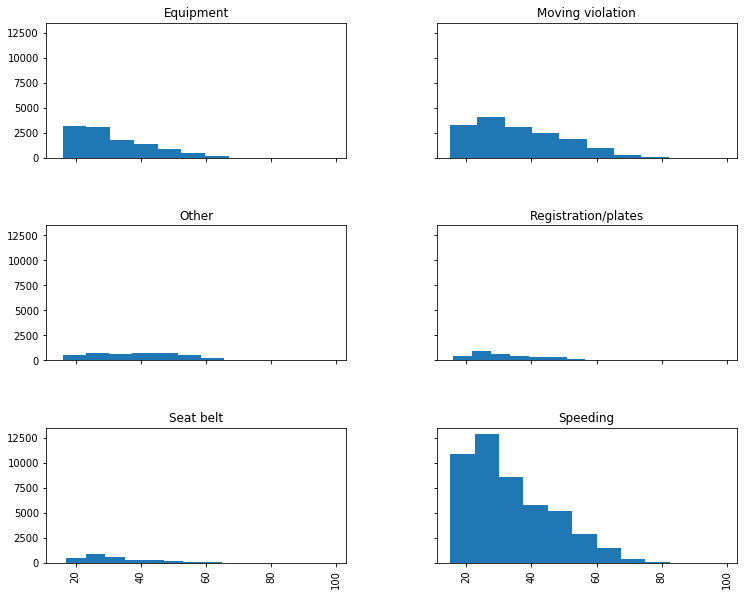

In [62]:
df.hist('driver_age', by='violation',sharex=True,sharey=True,figsize=(12,10))

## 13. Pretend you don't have the driver_age column, and create it from driver_age_raw (and call it new_age)

In [63]:
df.head(10)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,8.0,False,NaN,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,8.0,False,NaN,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,8.0,False,NaN,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,23.0,False,NaN,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,8.0,False,NaN,2005-03-14 10:00:00
5,2005-03-23,09:45,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,8.0,False,NaN,2005-03-23 09:45:00
6,2005-04-01,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,8.0,False,NaN,2005-04-01 17:30:00
7,2005-06-06,13:20,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,8.0,False,NaN,2005-06-06 13:20:00
8,2005-07-13,10:15,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,8.0,False,NaN,2005-07-13 10:15:00
9,2005-07-13,15:45,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,8.0,False,NaN,2005-07-13 15:45:00


In [64]:
df['new_age'] = df.stop_datetime.dt.year - df.driver_age_raw

In [65]:
df.loc[:,['driver_age','new_age']].head(10)

,driver_age,new_age
0,20.0,20.0
1,40.0,40.0
2,33.0,33.0
3,19.0,19.0
4,21.0,21.0
5,23.0,23.0
6,36.0,36.0
7,19.0,19.0
8,35.0,35.0
9,35.0,35.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae246cf940>,
      dtype=object)

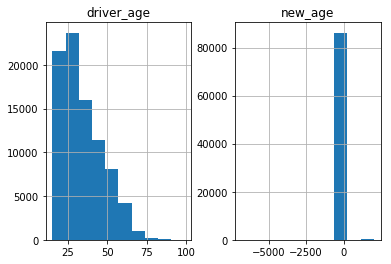

In [66]:
# compare the distributions
df[['driver_age', 'new_age']].hist()

In [67]:
df.driver_age.isna().sum()

5621

In [68]:
df.new_age.isna().sum()

5327

In [69]:
df.driver_age_raw.isna().sum()

5327

In [70]:
# compare the summary statistics (focus on min and max)
df[['driver_age', 'new_age']].describe()

,driver_age,new_age
count,86120.000000,86414.000000
mean,34.011333,39.784294
std,12.738564,110.822145
min,15.000000,-6794.000000
25%,23.000000,24.000000
50%,31.000000,31.000000
75%,43.000000,43.000000
max,99.000000,2015.000000


In [71]:
# calculate how many ages are outside that range
df.loc[(df.new_age<15) | (df.new_age>99)].shape

(294, 17)

In [72]:
5621-5327

294

In [73]:
# Make them as NaN
df.loc[(df.new_age<15) | (df.new_age>99),'new_age']=np.nan

In [74]:
# Check it out!
df[['driver_age', 'new_age']].describe()

,driver_age,new_age
count,86120.000000,86120.000000
mean,34.011333,34.011333
std,12.738564,12.738564
min,15.000000,15.000000
25%,23.000000,23.000000
50%,31.000000,31.000000
75%,43.000000,43.000000
max,99.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae23fbd7f0>,
      dtype=object)

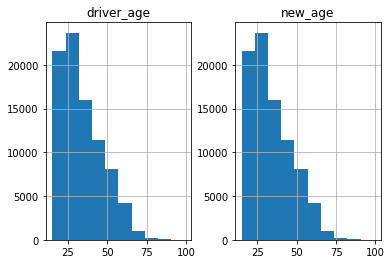

In [75]:
# Check the distribution!
df[['driver_age', 'new_age']].hist()

In [76]:
df.driver_age.isna().sum() == df.new_age.isna().sum()

True

- Don't assume that the head and tail are representative of the data
- Columns with missing values may still have bad data (driver_age_raw)
- Data cleaning sometimes involves guessing (driver_age)
- Use histograms for a sanity check